In [1]:
!pip install mxnet=="1.4.1"

    100% |████████████████████████████████| 28.4MB 1.9MB/s eta 0:00:011
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [13]:
!pip install gluonts=="0.4.1"

    100% |████████████████████████████████| 327kB 49.0MB/s ta 0:00:01
    100% |████████████████████████████████| 4.8MB 11.4MB/s ta 0:00:011
  Found existing installation: pydantic 1.1.1
    Uninstalling pydantic-1.1.1:
      Successfully uninstalled pydantic-1.1.1
  Found existing installation: gluonts 0.4.2
    Uninstalling gluonts-0.4.2:
      Successfully uninstalled gluonts-0.4.2
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import gluonts
gluonts.__version__

'0.4.1'

In [31]:
# standard imports
import numpy as np
import pandas as pd

# Vis
%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint

# mxnet
import mxnet as mx

# gluonts
from gluonts.dataset.util import to_pandas

# imports from utility function
import utils_gluonts10 as utils
from utils_gluonts10 import get_dataset, dataset_recipes
from utils_gluonts10_deepar import deepar
from utils_gluonts11_deepstate import deep_state


In [32]:
print(f"Available datasets: {list(dataset_recipes.keys())}")

Available datasets: ['m4_daily', 'm4_hourly', 'm4_monthly', 'm4_monthly_atm', 'm4_monthly_dates', 'm4_monthly_demographic', 'm4_monthly_finance', 'm4_monthly_industry', 'm4_monthly_macro', 'm4_monthly_micro', 'm4_monthly_other', 'm4_quarterly', 'm4_quarterly_atm', 'm4_quarterly_dates', 'm4_quarterly_demographic', 'm4_quarterly_finance', 'm4_quarterly_industry', 'm4_quarterly_macro', 'm4_quarterly_micro', 'm4_quarterly_other', 'm4_weekly', 'my_weekly_tm', 'm4_yearly', 'm4_yearly_industry', 'm4_yearly_macro', 'm4_yearly_micro']


#### Note

In SageMaker data are saved into the following folders (example shows m4_weekly):

```
saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_weekly/train/data.json
saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_weekly/test/data.json
```

In [33]:
dataname = "m4_monthly_demographic"
dataset = get_dataset(dataname, regenerate=False)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_demographic.


In [18]:
# get the first time series in the training set
train_entry = next(iter(dataset.train))
test_entry = next(iter(dataset.test))

# check keys
print(train_entry.keys())
print(test_entry.keys())

dict_keys(['start', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'target', 'feat_static_cat', 'source'])


In [28]:
train_entry

{'start': Timestamp('1750-01-31 00:00:00', freq='M'),
 'target': array([ 6000.,  4890.,  5330.,  5020.,  4360.,  5320.,  5420.,  4890.,
         5210.,  4600.,  4470.,  4450.,  4400.,  4390.,  4540.,  3850.,
         3980.,  3640.,  4560.,  4100.,  3410.,  4120.,  4010.,  4250.,
         4090.,  4550.,  4510.,  4030.,  3520.,  4140.,  4230.,  4150.,
         3910.,  3740.,  3460.,  3340.,  3970.,  3640.,  3560.,  3790.,
         3380.,  3530.,  3110.,  3110.,  3280.,  3020.,  3310.,  3450.,
         3740.,  3610.,  3430.,  3440.,  2680.,  3110.,  3740.,  2800.,
         3170.,  3330.,  3100.,  3580.,  3390.,  2710.,  2950.,  2450.,
         2560.,  2200.,  2900.,  2650.,  2890.,  2710.,  2720.,  2670.,
         2360.,  2670.,  2580.,  3310.,  2800.,  3090.,  2660.,  2030.,
         2530.,  2320.,  2360.,  2690.,  3010.,  2870.,  3490.,  3490.,
         3280.,  2940.,  3100.,  3370.,  2850.,  3310.,  3280.,  3480.,
         3280.,  3750.,  3300.,  3200.,  4140.,  3420.,  4050.,  3780.,


In [20]:
len(dataset.train)

5728

## Plot Series

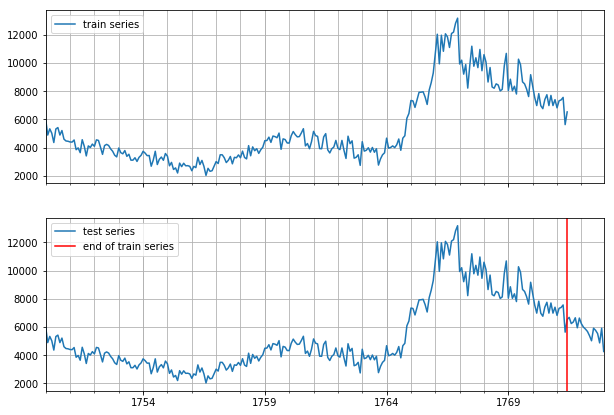

In [29]:
test_series = to_pandas(test_entry)
train_series = to_pandas(train_entry)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series.plot(ax=ax[1])
ax[1].axvline(train_series.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

In [12]:
# %%time
# results = pd.DataFrame()

# for i in range(42, 47):
#     print("Seed:", i)
#     df = deepar(data="m4_monthly_dates", seed=i, epochs=100, batches=50)
#     pprint(df)
#     results = results.append(df)

# results

In [35]:
df = deep_state(seed=42, data="m4_quarterly", epochs=1000, batches=50)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly.


TypeError: __init__() got an unexpected keyword argument 'context_length'

In [ ]:
!jupyter nbconvert --output-dir="../html_outputs" --to html gluonts11-own-m4_subsets.ipynb